# Power Outages
This project uses major power outage data in the continental U.S. from January 2000 to July 2016. Here, a major power  outage is defined as a power outage that impacted at least 50,000 customers or caused an unplanned firm load loss of atleast 300MW. Interesting questions to consider include:
- Where and when do major power outages tend to occur?
- What are the characteristics of major power outages with higher severity? Variables to consider include location, time, climate, land-use characteristics, electricity consumption patterns, economic characteristics, etc. What risk factors may an energy company want to look into when predicting the location and severity of its next major power outage?
- What characteristics are associated with each category of cause?
- How have characteristics of major power outages changed over time? Is there a clear trend?

### Getting the Data
The data is downloadable [here](https://engineering.purdue.edu/LASCI/research-data/outages/outagerisks).

A data dictionary is available at this [article](https://www.sciencedirect.com/science/article/pii/S2352340918307182) under *Table 1. Variable descriptions*.

### Cleaning and EDA
- Note that the data is given as an Excel file rather than a CSV. Open the data in Excel or another spreadsheet application and determine which rows and columns of the Excel spreadsheet should be ignored when loading the data in pandas.
- Clean the data.
    - The power outage start date and time is given by `OUTAGE.START.DATE` and `OUTAGE.START.TIME`. It would be preferable if these two columns were combined into one datetime column. Combine `OUTAGE.START.DATE` and `OUTAGE.START.TIME` into a new datetime column called `OUTAGE.START`. Similarly, combine `OUTAGE.RESTORATION.DATE` and `OUTAGE.RESTORATION.TIME` into a new datetime column called `OUTAGE.RESTORATION`.
- Understand the data in ways relevant to your question using univariate and bivariate analysis of the data as well as aggregations.

*Hint 1: pandas can load multiple filetypes: `pd.read_csv`, `pd.read_excel`, `pd.read_html`, `pd.read_json`, etc.*

*Hint 2: `pd.to_datetime` and `pd.to_timedelta` will be useful here.*

*Tip: To visualize geospatial data, consider [Folium](https://python-visualization.github.io/folium/) or another geospatial plotting library.*

### Assessment of Missingness
- Assess the missingness of a column that is not missing by  design.

### Hypothesis Test
Find a hypothesis test to perform. You can use the questions at the top of the notebook for inspiration.

# Summary of Findings

### Introduction

This dataset contains various information relevent to the major outage events occurs in the continents of U.S., and it also include information about the characteristics of the states in the continental U.S., including their climate and region characteristics, electricity consumption patterns, economic characteristics, population characteristics, and land-cover characteristics.

These information can help us get clue for finding the pattern of major outages with other factors, such as the time and place that more likely to encounter majot outages. Also, it provide valuable information for researching the history trend of major power outages and check the comprehensive ability of handling risks for electricity system of U.S. continent.

In our project, we use this dataset to learn the tendency of major outage events and find what variables are the risk factors that have a higher severity level for power outages.

### Cleaning and EDA

1. skip rows and select useful columns
- At the beginning process of cleaning the data, we import the data by reading in excel with skipping rows. And also accroding to the question and direction we want to explore the data, we pick following variables from the original data set`'YEAR', 'MONTH', 'U.S._STATE', 'NERC.REGION', 'CLIMATE.REGION',  'CLIMATE.CATEGORY', 'OUTAGE.START.DATE', 'OUTAGE.START.TIME', 'OUTAGE.RESTORATION.DATE', 'OUTAGE.RESTORATION.TIME', 'CAUSE.CATEGORY', 'CAUSE.CATEGORY.DETAIL', 'OUTAGE.DURATION', 'DEMAND.LOSS.MW', 'CUSTOMERS.AFFECTED', 'RES.SALES', 'COM.SALES', 'IND.SALES', 'TOTAL.SALES', 'POPULATION', 'POPPCT_URBAN', 'POPDEN_RURAL', 'POPDEN_URBAN'` .

2. drop `'CLIMATE.REGION'` nulls
- When doing exploratory data analysis, we try the combination of variable `'CLIMATE.REGION'` and `'affect_level'` by groupbying the 'CLIMATE.REGION' and use aggregation function `mean` to observe the mean affect level of each region. Interestingly, 'East North Central' region has an abnormal high severity level of outages, so we want to further explore whether this high severity level is happened due to chance or not in the following hypothesis test section, thus we clean the data of `'CLIMATE.REGION'` by removing its' 6 missing value in case of them interrupting the performance of hypothesis test.

3. combining variables to form new variables
- Then by combining the date object in timestamp format with time object in date time object, we get two new variable `'OUTAGE.START'` and `'OUTAGE.RESTORATION'` about completed detail time for power outage time that allow us to analyze the data in terms of time aspect in a more detailed way. 


4. impute missing value and form new variable to measure severity level
- For furthering exploring the risk factors, we want to create a variable that both measures the longitude of power outages (time span of outages represented by variable `'OUTAGE.DURATION'` which measures the total minutes of power outages) and the horizontal influence scope of power outages (number of customers affected which represented by variable `'CUSTOMERS.AFFECTED'`) to show the severitiness of the outages, but before that we need to handle the missingness of these two variables, because in both of these two varaibles exists NaN value that interrupts creating new variable. To impute these missingness in each column, we find out the missingness of variable `'CUSTOMERS.AFFECTED'`is dependent on the population of that state which is represented in variable `'POPULATION'`,thus in order to impute the `'CUSTOMERS.AFFECTED'`, we cut the `'POPULATION'` into 10 intervals and find the corresponding median number of population in each group to fill in the `'CUSTOMERS.AFFECTED'`'s missing value. As well, we impute the missing value of `'OUTAGE.DURATION'` by checking out it is dependent on the variable `'CAUSE.CATEGORY'` which describes the cause of duratioin, such as whether the outage is caused by an extreme weather event or intentional attack, then we fill in the missing value according to each category group's median duration length. By dong that step, then we can make a new variable `'total_affect_min'` by multiplying the `'CUSTOMERS.AFFECTED'` and `'OUTAGE.DURATION'`. By getting this new variable, we can classify the level of severity of power outages by splitting the data into 9 ranks and store this rank score into a new variable 'affect_level', thus this variable displays the severity of the power outages. 

**Univariate Analysis**

In this part of analysis, we study the most common time in day and year, and most common place of occurence of power outages by drawing the distribution and pie-chart. Also in this section we learn about the proportion of cause of the power outages. By doing these analysis, it allow us to have a better understanding of the consitution of power outages, and inspire us to do bivariate analysis, for instance, in each state what is the proportion of different causes for outages.

**Bivariate ANalysis**

In this section, we study in each climate region has which states and the total number of outages under the state, and also study about the overall duration of power outages trend by years appears decreasing, and we also learn about in each state the number of outages classified by cause of outages, and this help us to deeper knowing the weather and cause of the outages that influence the most.


**Interesting Aggregate**

In this portion, we decide to further explore the realation of severity of outages and other variables. We will consider its relation with outages' cause, economic characteristics (sales), and geographical and meteorological characteristics.


### Assessment of Missingness
1. Assess the missingness of `'CAUSE.CATEGORY.DETAIL'` dependent on `'CAUSE.CATEGORY'`

    - When doing exploratory data analysis, we find there are 471 missing values missing in this column. First of all, to justify whether the `'CAUSE.CATEGORY.DETAIL'` is NMAR, we check back its data generating process. According to the article ["A multi-hazard approach to assess severe weather-induced major power outage risks in the U.S."][1], it specifically asserted that "The quality and completeness of the data is checked, validated and approved by the Office of Electricity Delivery and Energy Reliability." Therefore, the data generating process is guaranteed, the `'CAUSE.CATEGORY.DETAIL'` should not be NMAR. Thus, we would like to check whether `'CAUSE.CATEGORY.DETAIL'` is MAR with other columns. After we observe across the varaibles, we decide to check on the column `CAUSE.CATEGORY`, since we infer that `'CAUSE.CATEGORY.DETAIL'` is missing when the data in`'CAUSE.CATEGORY'` is certain type of cause reason, such as public appeal. So, to visually checks whether the MAR exists, we draw the distribution of `CAUSE.CATEGORY` by groupbying the `CAUSE.CATEGORY.DETAIL` missingness, and we observe from the diagram that 'system operability disruption', 'public appeal' and 'islanding' are more likely missing in the `'CAUSE.CATEGORY.DETAIL'` column.
    - Then we perfrom a permutation test on calculating the total variance distance for each categorical value in the distribution of `CAUSE.CATEGORY` by missing value in `CAUSE.CATEGORY.DETAIL` with the distribution of `CAUSE.CATEGORY` by non-missing value in `CAUSE.CATEGORY.DETAIL` And we set up a confidence level of 95 percent, which means I have a 5 percent chance of being wrong that the missingness of CAUSE.CATEGORY.DETAIL is dependent on `CAUSE.CATEGORY`. So, in the 10000 permutation test, if at least 95 percent of TVD that I permuted in the test is smaller than my observation, I can reject the null hypothesis that the distribution of `CAUSE.CATEGORY` for missingness of `CAUSE.CATEGORY.DETAIL` comes from the same distribution of `CAUSE.CATEGORY` for non-missingness of `CAUSE.CATEGORY.DETAIL`; vice versa, we fails to reject the null hypothesis and the missing value of `CAUSE.CATEGORY.DETAIL` is not dependent on `CAUSE.CATEGORY`.
    - According to our result, our observed TVD is 0.410,the p-value is 0.0, which statistically means that the missing value of `CAUSE.CATEGORY.DETAIL` is dependent on the `CAUSE.CATEGORY`.


2. Assess the missingness of `'CUSTOMERS.AFFECTED'` not dependent on `'CLIMATE.CATEGORY'`

    - We are interested whether the missingness of `'CUSTOMERS.AFFECTED'` is dependent on `'CLIMATE.CATEGORY'`; in other words, does the missing value in the number of CUSTOMERS.AFFECTED dependent on temperature(warm, normal, and cold). We believe the data is not a NMAR since NMAR refers to the missingness that result from the data itself, mainly through the data generating process. To justify `'CUSTOMERS.AFFECTED'` is not NMAR, we found the data source from the article ['A multi-hazard approach to assess severe weather-induced major power outage risks in the U.S.'][1], in which it mentioned in its data source section that "the quality and completenss of the data is checked, validated and approved' by the official. Thus, there is likely no issue in the data generating process. Thus, we would like to see whether the data is MAR by checking observed data on other columns. After looking through other columns, we decide to check whether `'CLIMATE.CATEGORY'` column tells us the likelihood of the missing data. Since we assume in normal weather (or in other words favorable temperature) the data is more likely to be recorded. We decide to use a permutation test to test this assumption. 

    - To understand it visually, we first draw the distribution of `'CLIMATE.CATEGORY'` by groupbying the `CUSTOMERS.AFFECTED` missingness, and we observe from the diagram that 'warm', 'normal' and 'cold' has very small difference between missing and non-missing distribution. Then we perfrom a permutation test on calculating the total variance distance for each categorical value in the distribution of `CLIMATE.CATEGORY` by missing value in `CUSTOMERS.AFFECTED` with the distribution of `CLIMATE.CATEGORY` by non-missing value in `CUSTOMERS.AFFECTED` And we set up a confidence level of 95 percent, which means I have a 5 percent chance of being wrong that the missingness of `CUSTOMERS.AFFECTED` is dependent on `CLIMATE.CATEGORY`. So, in the 10000 permutation test, if at least 95 percent of TVD that I permuted in the test is smaller than my observation, I can reject the null hypothesis that the distribution of `CLIMATE.CATEGORY` for missingness of `CUSTOMERS.AFFECTED` comes from the same distribution of `CLIMATE.CATEGORY` for non-missingness of `CUSTOMERS.AFFECTED`; vice versa, we fails to reject the null hypothesis and the missing value of `CUSTOMERS.AFFECTED` is not dependent on `CAUSE.CATEGORY`.

    - According to our result, our observed TVD is 0.034, the p-value is 0.3697, which statistically means that 36.97 percent of TVD I permuted is greater than my observed TVD, thus the missing value of `CUSTOMERS.AFFECTED` is not dependent on the `CLIMATE.CATEGORY` according to our test.



### Hypothesis Test

Our hypothesis test is inspired when doing the Exploratory Data Analysis, we want to know whether the high affect level of 'East North Central' climate region is due to chance. 
- **Null hypothesis:** Severity level of outages and climate regions **are not** related – the high severety level of outages in East North Central is due to chance alone.
    - In other words, if we picked 138 outages randomly from the population of 1534 outages, it is reasonable to see an mean this high.
- **Alternative hypothesis:** Severity level of outages and climate regions **are** related – the high severety level of outages in East North Central is not due to chance alone.
    - In other words, if we picked 138 outages randomly from the population of 1534 outages, 95 percent of the mean is smaller than our osbserved affect level, the abnormal high observed affect level is not due to chance.
    
We set up a 95 percent confidence interval, which means there is 5 percent chance that we might be wrong and the high affect level of east north central is due to chance.

We plan to use average affect level (a representation of severity level of outages computed from `'CUSTOMERS.AFFECTED'` and `'OUTAGE.DURATION'`) as our test statistic. By groupbying the `'CLIMATE.REGION'` and use mean function, we get the mean affect level for each region, and get an observed statistic of 6.413 affect level for East North Central. By repeatedly sampling 138 outages from the population and calculate affect level mean for each sample, we obatain an array of simulated statistics. Since our p value is 0.0, we reject the null hypothesis that the high affect level appeared due to chance.

[1]: <https://www.sciencedirect.com/science/article/abs/pii/S0951832017307767> "A multi-hazard approach to assess severe weather-induced major power outage risks in the U.S."

# Code

In [1]:
#import desired packages
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures
import datetime as dt

In [2]:
#install desired packages
!pip install openpyxl

### Cleaning and EDA

#### Clean the data

**1) Load Data and remove useless rows**

We noticed that there are blanck rows above the columns names, thus we deleted them within the excel.
When loading the excel into notebook, we further removed the row that contains column name description since they are useless for doing this project. 

In [3]:
#load the excel file, and skip the row that contains column name description 
#We notice that there are blanck rows above the columns names, thus we already deleted them within the excel
df = pd.read_excel('outage.xlsx', skiprows = lambda x: x in [1])
df.head()

,variables,OBS,YEAR,MONTH,U.S._STATE,POSTAL.CODE,NERC.REGION,CLIMATE.REGION,ANOMALY.LEVEL,CLIMATE.CATEGORY,...,POPPCT_URBAN,POPPCT_UC,POPDEN_URBAN,POPDEN_UC,POPDEN_RURAL,AREAPCT_URBAN,AREAPCT_UC,PCT_LAND,PCT_WATER_TOT,PCT_WATER_INLAND
0,NaN,1,2011,7.0,Minnesota,MN,MRO,East North Central,-0.3,normal,...,73.27,15.28,2279.0,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743
1,NaN,2,2014,5.0,Minnesota,MN,MRO,East North Central,-0.1,normal,...,73.27,15.28,2279.0,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743
2,NaN,3,2010,10.0,Minnesota,MN,MRO,East North Central,-1.5,cold,...,73.27,15.28,2279.0,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743
3,NaN,4,2012,6.0,Minnesota,MN,MRO,East North Central,-0.1,normal,...,73.27,15.28,2279.0,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743
4,NaN,5,2015,7.0,Minnesota,MN,MRO,East North Central,1.2,warm,...,73.27,15.28,2279.0,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743


Understand each variables from statistics

In [4]:
#see statistics through .describe()
df.describe()

,variables,OBS,YEAR,MONTH,ANOMALY.LEVEL,OUTAGE.DURATION,DEMAND.LOSS.MW,CUSTOMERS.AFFECTED,RES.PRICE,COM.PRICE,...,POPPCT_URBAN,POPPCT_UC,POPDEN_URBAN,POPDEN_UC,POPDEN_RURAL,AREAPCT_URBAN,AREAPCT_UC,PCT_LAND,PCT_WATER_TOT,PCT_WATER_INLAND
count,0.0,1534.000000,1534.000000,1525.000000,1525.000000,1476.000000,829.000000,1.091000e+03,1512.000000,1512.000000,...,1534.000000,1534.000000,1534.000000,1524.000000,1524.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000
mean,NaN,767.500000,2010.119296,6.234754,-0.096852,2625.398374,536.287093,1.434562e+05,11.968373,10.135053,...,80.967112,9.545267,2594.174967,1558.041142,39.473491,8.604348,1.117608,90.158521,9.841405,2.911191
std,NaN,442.971971,3.822306,3.254510,0.739957,5942.483307,2196.450393,2.869863e+05,3.088631,2.824150,...,11.900026,5.240315,1083.200091,313.149226,30.890074,11.134773,0.995424,10.519099,10.518892,2.115077
min,NaN,1.000000,2000.000000,1.000000,-1.600000,0.000000,0.000000,0.000000e+00,5.650000,4.700000,...,38.660000,0.000000,1232.600000,988.700000,0.400000,0.050000,0.000000,58.459995,0.240151,0.240151
25%,NaN,384.250000,2008.000000,4.000000,-0.500000,102.250000,3.000000,9.650000e+03,9.540000,8.017500,...,74.570000,5.220000,2016.300000,1307.800000,15.200000,3.350000,0.590000,86.382550,2.742036,1.730658
50%,NaN,767.500000,2011.000000,6.000000,-0.300000,701.000000,168.000000,7.013500e+04,11.460000,9.465000,...,84.050000,9.080000,2380.000000,1528.600000,29.500000,5.280000,0.970000,95.164177,4.835823,2.090873
75%,NaN,1150.750000,2013.000000,9.000000,0.300000,2880.000000,400.000000,1.500000e+05,13.900000,11.340000,...,89.810000,12.020000,2847.425000,1732.200000,54.600000,8.680000,1.460000,97.258336,13.617450,3.645862
max,NaN,1534.000000,2016.000000,12.000000,2.300000,108653.000000,41788.000000,3.241437e+06,34.580000,32.140000,...,100.000000,40.250000,9856.500000,2220.700000,142.300000,100.000000,6.210000,99.759849,41.540005,10.294118


To prepare the data for the following hypothesis test, we need our data to have no `NaN` value in the `'CLIMATE.REGION'` column. 

In [5]:
#drop rows with NaN value in 'CLIMATE.REGION' column
df = df[~df['CLIMATE.REGION'].isna()]
df.head()

,variables,OBS,YEAR,MONTH,U.S._STATE,POSTAL.CODE,NERC.REGION,CLIMATE.REGION,ANOMALY.LEVEL,CLIMATE.CATEGORY,...,POPPCT_URBAN,POPPCT_UC,POPDEN_URBAN,POPDEN_UC,POPDEN_RURAL,AREAPCT_URBAN,AREAPCT_UC,PCT_LAND,PCT_WATER_TOT,PCT_WATER_INLAND
0,NaN,1,2011,7.0,Minnesota,MN,MRO,East North Central,-0.3,normal,...,73.27,15.28,2279.0,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743
1,NaN,2,2014,5.0,Minnesota,MN,MRO,East North Central,-0.1,normal,...,73.27,15.28,2279.0,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743
2,NaN,3,2010,10.0,Minnesota,MN,MRO,East North Central,-1.5,cold,...,73.27,15.28,2279.0,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743
3,NaN,4,2012,6.0,Minnesota,MN,MRO,East North Central,-0.1,normal,...,73.27,15.28,2279.0,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743
4,NaN,5,2015,7.0,Minnesota,MN,MRO,East North Central,1.2,warm,...,73.27,15.28,2279.0,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743


**2) Drop Columns Irrelevant to Our Topic**

After exploring and reading description of columns in `df`, we decided to keep the following columns:

- **Outage Setting Dimention**
    * Time Dimension: `'YEAR'`, `'MONTH'`, `'OUTAGE.START.DATE'`, `'OUTAGE.START.TIME'`, `'OUTAGE.RESTORATION.DATE'`, `'OUTAGE.RESTORATION.TIME'`
    * Geographic Dimension: `'U.S._STATE'`, `'NERC.REGION'`
    * Aerography Dimension: `'CLIMATE.REGION'`,  `'CLIMATE.CATEGORY'`
    * Population Dimiension: `'RES.SALES'`, `'COM.SALES'`, `'IND.SALES'`, `'TOTAL.SALES'`, `'POPULATION'`, `'POPPCT_URBAN'`, `'POPDEN_RURAL'`, `'POPDEN_URBAN'`
    
- **Outage Cause Dimension** `'CAUSE.CATEGORY'`, `'CAUSE.CATEGORY.DETAIL'`
- **Outage Severity Dimension** `'OUTAGE.DURATION'`, `'DEMAND.LOSS.MW'`, `'CUSTOMERS.AFFECTED'`

So that we have our `new_df` DataFrame

In [6]:
new_df = df.copy()
#only include columns we are interested in
new_df = (new_df[['YEAR', 'MONTH', 'U.S._STATE', 'NERC.REGION', 
                'CLIMATE.REGION',  'CLIMATE.CATEGORY', 'OUTAGE.START.DATE', 'OUTAGE.START.TIME',
                'OUTAGE.RESTORATION.DATE', 'OUTAGE.RESTORATION.TIME', 'CAUSE.CATEGORY', 'CAUSE.CATEGORY.DETAIL',
                'OUTAGE.DURATION', 'DEMAND.LOSS.MW', 'CUSTOMERS.AFFECTED', 'RES.SALES', 'COM.SALES', 'IND.SALES',
                 'TOTAL.SALES', 'POPULATION', 'POPPCT_URBAN', 'POPDEN_RURAL', 'POPDEN_URBAN']]
         )
#show the new DataFrame
new_df.head()

,YEAR,MONTH,U.S._STATE,NERC.REGION,CLIMATE.REGION,CLIMATE.CATEGORY,OUTAGE.START.DATE,OUTAGE.START.TIME,OUTAGE.RESTORATION.DATE,OUTAGE.RESTORATION.TIME,...,DEMAND.LOSS.MW,CUSTOMERS.AFFECTED,RES.SALES,COM.SALES,IND.SALES,TOTAL.SALES,POPULATION,POPPCT_URBAN,POPDEN_RURAL,POPDEN_URBAN
0,2011,7.0,Minnesota,MRO,East North Central,normal,2011-07-01,17:00:00,2011-07-03,20:00:00,...,NaN,70000.0,2332915.0,2114774.0,2113291.0,6562520.0,5348119,73.27,18.2,2279.0
1,2014,5.0,Minnesota,MRO,East North Central,normal,2014-05-11,18:38:00,2014-05-11,18:39:00,...,NaN,NaN,1586986.0,1807756.0,1887927.0,5284231.0,5457125,73.27,18.2,2279.0
2,2010,10.0,Minnesota,MRO,East North Central,cold,2010-10-26,20:00:00,2010-10-28,22:00:00,...,NaN,70000.0,1467293.0,1801683.0,1951295.0,5222116.0,5310903,73.27,18.2,2279.0
3,2012,6.0,Minnesota,MRO,East North Central,normal,2012-06-19,04:30:00,2012-06-20,23:00:00,...,NaN,68200.0,1851519.0,1941174.0,1993026.0,5787064.0,5380443,73.27,18.2,2279.0
4,2015,7.0,Minnesota,MRO,East North Central,warm,2015-07-18,02:00:00,2015-07-19,07:00:00,...,250.0,250000.0,2028875.0,2161612.0,1777937.0,5970339.0,5489594,73.27,18.2,2279.0


**3) Create two new columns that measure time**

- we first combine `'OUTAGE.START.DATE'` and `'OUTAGE.RESTORATION.DATE'` into a new column named `'OUTAGE.START'` 
- similarly, we then combine `'RESTORATION.START.DATE'` and `'RESTORATION.RESTORATION.DATE'` into a new column named `'RESTORATION.START'` 

In [7]:
#get the date from 'OUTAGE.START.DATE' and combine it with the time from 'OUTAGE.START.TIME'
#convert both part to str to enable this combination, and replace 'Nat' with nan to avoid error in the combination
new_df['OUTAGE.START'] = pd.to_datetime(df['OUTAGE.START.DATE'].dt.date.astype(str).replace('NaT', np.nan)+
                        ' '+df['OUTAGE.START.TIME'].astype(str))
#get the date from 'RESTORATION.START.DATE' and combine it with the time from 'RESTORATION.START.TIME'
#convert both part to str to enable this combination, and replace 'Nat' with nan to avoid error in the combination
new_df['OUTAGE.RESTORATION'] = pd.to_datetime(df['OUTAGE.RESTORATION.DATE'].dt.date.astype(str).replace('NaT', np.nan)+
                                ' '+df['OUTAGE.RESTORATION.TIME'].astype(str))
new_df[['OUTAGE.START', 'OUTAGE.RESTORATION']].head()

,OUTAGE.START,OUTAGE.RESTORATION
0,2011-07-01 17:00:00,2011-07-03 20:00:00
1,2014-05-11 18:38:00,2014-05-11 18:39:00
2,2010-10-26 20:00:00,2010-10-28 22:00:00
3,2012-06-19 04:30:00,2012-06-20 23:00:00
4,2015-07-18 02:00:00,2015-07-19 07:00:00


#### 5) Create one new column that measure outages' severity level

We plan to create a new variable that measure the severity of the outages by mutiply `'CUSTOMERS.AFFECTED'` with `'OUTAGE.DURATION'`. However, we find that there are both missing values in the two columns. Thus, before calculating this new variable, we need to perform imputation on `'CUSTOMERS.AFFECTED'` and `'OUTAGE.DURATION'`

**5.1 Imputation of `'CUSTOMERS.AFFECTED'`**

we want to generate a new column that measure the severity level of the outages, and will want to use `'CUSTOMERS.AFFECTED'` as one of the parameter. However, we find that there are many missing value in this column, so our first step will be impute value to the column.

We first plot a graph to explore the relation between `CUSTOMERS.AFFECTED` missing value and population

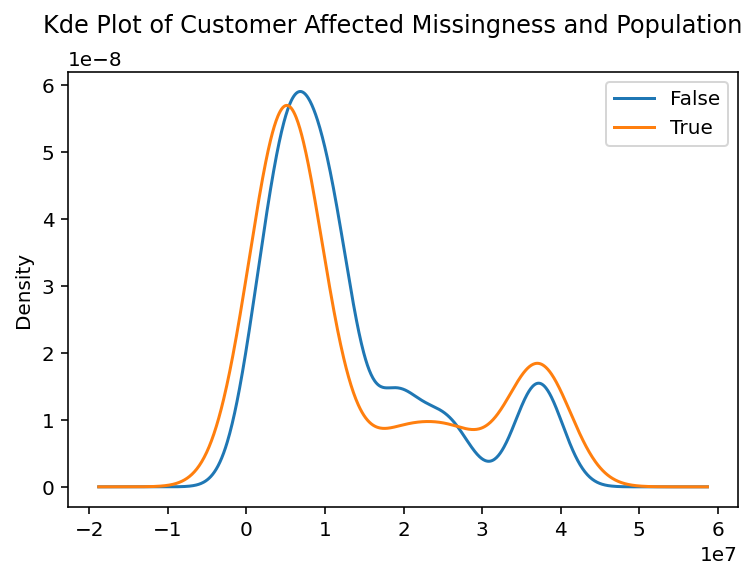

In [8]:
#create bins for population column
new_df1 = new_df.copy()
pop = pd.qcut(new_df1['POPULATION'], 10)
new_df1['pop_bin'] = pop
#plot to explore missingness
new_df1['CUSTOMERS.AFFECTED_missing']=new_df1['CUSTOMERS.AFFECTED'].isna()
(
    new_df1.groupby('CUSTOMERS.AFFECTED_missing')['POPULATION'].plot(kind='kde',legend=True)
)
plt.suptitle('Kde Plot of Customer Affected Missingness and Population')

plt.show();

To test whether the missingness of `'CUSTOMERS.AFFECTED'` is dependent on the `'POPULATION'`, we use the Kolmogorov-Smirnov test statistic to run a permutation test. Since the output p-value is 5.2314248281588706e-12 which is very small, so we reject the null hypothesis that the population distribution with `'CUSTOMERS.AFFECTED'` value missing come from the same population distribution with `'CUSTOMERS.AFFECTED'` value not missing. 

Thus, the missingness type of `'CUSTOMERS.AFFECTED'` is **MAR**.

In [9]:
# 'population' when 'customer.affected' is missing 
cus_mis = new_df1.loc[new_df1['CUSTOMERS.AFFECTED_missing'], 'POPULATION']
# 'population' when 'customer.affected' is not missing
cus_not_mis = new_df1.loc[~new_df1['CUSTOMERS.AFFECTED_missing'], 'POPULATION']
# label(), population
#calculate K-s statistics
from scipy import stats
stats.ks_2samp(cus_mis, cus_not_mis)

KstestResult(statistic=0.2045521215840884, pvalue=5.2314248281588706e-12)

Thus, we impute the customer affected with median by different population bin.

In [10]:
#write midian impute function
def median_impute(ser):
    return ser.fillna(ser.median())
new_df1['CUSTOMERS.AFFECTED_old'] = new_df1['CUSTOMERS.AFFECTED'] 
new_df1['CUSTOMERS.AFFECTED'] = new_df1.groupby('pop_bin')['CUSTOMERS.AFFECTED'].transform(median_impute)
#new_df1 has the customers affected's missing value imputed
new_df1.head()

,YEAR,MONTH,U.S._STATE,NERC.REGION,CLIMATE.REGION,CLIMATE.CATEGORY,OUTAGE.START.DATE,OUTAGE.START.TIME,OUTAGE.RESTORATION.DATE,OUTAGE.RESTORATION.TIME,...,TOTAL.SALES,POPULATION,POPPCT_URBAN,POPDEN_RURAL,POPDEN_URBAN,OUTAGE.START,OUTAGE.RESTORATION,pop_bin,CUSTOMERS.AFFECTED_missing,CUSTOMERS.AFFECTED_old
0,2011,7.0,Minnesota,MRO,East North Central,normal,2011-07-01,17:00:00,2011-07-03,20:00:00,...,6562520.0,5348119,73.27,18.2,2279.0,2011-07-01 17:00:00,2011-07-03 20:00:00,"(4337397.2, 5890740.0]",False,70000.0
1,2014,5.0,Minnesota,MRO,East North Central,normal,2014-05-11,18:38:00,2014-05-11,18:39:00,...,5284231.0,5457125,73.27,18.2,2279.0,2014-05-11 18:38:00,2014-05-11 18:39:00,"(4337397.2, 5890740.0]",True,NaN
2,2010,10.0,Minnesota,MRO,East North Central,cold,2010-10-26,20:00:00,2010-10-28,22:00:00,...,5222116.0,5310903,73.27,18.2,2279.0,2010-10-26 20:00:00,2010-10-28 22:00:00,"(4337397.2, 5890740.0]",False,70000.0
3,2012,6.0,Minnesota,MRO,East North Central,normal,2012-06-19,04:30:00,2012-06-20,23:00:00,...,5787064.0,5380443,73.27,18.2,2279.0,2012-06-19 04:30:00,2012-06-20 23:00:00,"(4337397.2, 5890740.0]",False,68200.0
4,2015,7.0,Minnesota,MRO,East North Central,warm,2015-07-18,02:00:00,2015-07-19,07:00:00,...,5970339.0,5489594,73.27,18.2,2279.0,2015-07-18 02:00:00,2015-07-19 07:00:00,"(4337397.2, 5890740.0]",False,250000.0


**5.2 Imputation of `'CUSTOMERS.AFFECTED'`**

we want to generate a new column that measure the severity level of the outages, and will want to use `'CUSTOMERS.AFFECTED'` as one of the parameter. However, we find that there are many missing value in this column, so will impute values to the column.

We first explore the relation between `'OUTAGE.DURATION'` missingness and `'CAUSE.CATEGORY'`, and visualize it with overlaid bar chart since CAUSE.CATEGORY is a categorical variable.

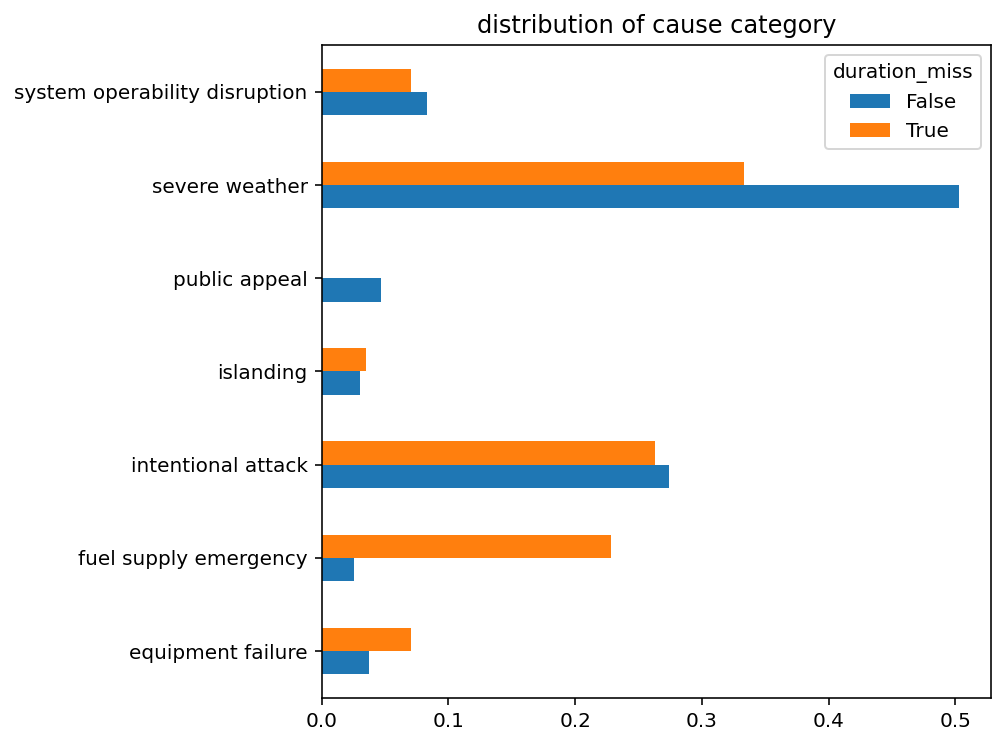

In [11]:
#handle OUTAGE.DURATION missingness by cause.category
new_df1['duration_miss'] = new_df1['OUTAGE.DURATION'].isna()
dist =(
    new_df1
    .pivot_table(index='CAUSE.CATEGORY',columns='duration_miss',aggfunc='size')
    .fillna(0)
    .apply(lambda x: x / x.sum())
)
dist.plot(kind='barh',figsize=(6,6),title='distribution of cause category');
plt.ylabel ("");

We then perform a permutation test to confirm the way we will impute missing duration

In [12]:
#compute obs tvd
observed_tvd = np.sum(np.abs(dist.diff(axis=1).iloc[:,-1])) / 2
observed_tvd
#perform permutation test
n_repetitions = 10000

per_df = new_df1.copy()[['CAUSE.CATEGORY', 'duration_miss']]
tvds = []
for _ in range(n_repetitions):
    
    shuffled_miss = (
        per_df['duration_miss']
        .sample(replace=False, frac=1)
        .reset_index(drop=True)
    )
    
    per_df['Shuffled Miss'] = shuffled_miss
    
    # compute the tvd
    shuffed_emp_distributions = (
        per_df
        .pivot_table(columns='Shuffled Miss', index='CAUSE.CATEGORY', values=None, aggfunc='size')
        .fillna(0)
        .apply(lambda x:x/x.sum())
    )
    
    tvd = np.sum(np.abs(shuffed_emp_distributions.diff(axis=1).iloc[:,-1])) / 2
    # add it to the list of results
    
    tvds.append(tvd)
p_val = (tvds >= observed_tvd).mean()
p_val

0.0025

We use a 95% Confidence Interval since it is most commonly recogonized. Since `p_val` = 0.0025 < 0.05, we reject the null hypothesis that the missingness of `'OUTAGE.DURATION'` is not dependent on `'CAUSE.CATEGORY'`. Thus, we conclude that the missingness of `'OUTAGE.DURATION'` is **MAR**. Thus we can impute the duration with median by different cause category. To comfirm our imputation is reasonable, we plot an overlaid histagram

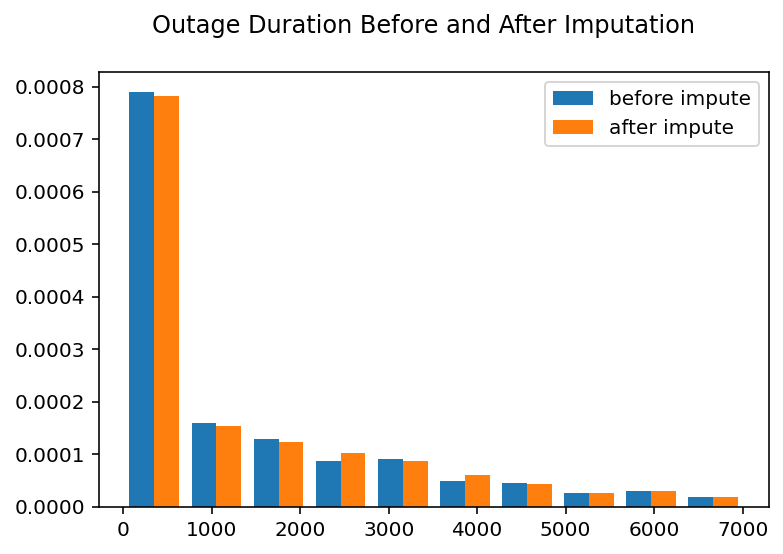

In [13]:
#impute 'OUTAGE.DURATION' with midan of different cause category
new_df1['OUTAGE.DURATION']=new_df1.groupby('CAUSE.CATEGORY')['OUTAGE.DURATION'].transform(median_impute)
#define function that filter outliers
def filter_outlier(df,col):
    df1 =df.copy()
    Q1 = np.nanpercentile(df1[col], 25,
                   method = 'midpoint')
 
    Q3 = np.nanpercentile(df1[col], 75,
                       method = 'midpoint')
    IQR = Q3 - Q1
    # Upper bound
    upper = np.where(df1[col] < (Q3+1.5*IQR))
    # Lower bound
    lower = np.where(df1[col] > (Q1-1.5*IQR))
    #df1.drop(upper[0], inplace = True)
    #df1.drop(lower[0], inplace = True)
    df1 = df1[(df1[col] < (Q3+1.5*IQR))&(df1[col] > (Q1-1.5*IQR))]
    return df1
new_df1_filter = filter_outlier(new_df1,'OUTAGE.DURATION')
new_df_filter = filter_outlier(new_df[~new_df['OUTAGE.DURATION'].isna()],'OUTAGE.DURATION')
#plot the 
plt.hist([new_df_filter['OUTAGE.DURATION'],new_df1_filter['OUTAGE.DURATION'].dropna()],density=True);
plt.legend(['before impute','after impute'])
plt.suptitle('Outage Duration Before and After Imputation')
plt.show();

**5.3 Calculate measurement for outage severity**

We measure severity using duration and number of customers being affected after imputation. The `affect_level` are calculated by qcut, so that we can represent the severity with levels, each represent an extent of severity

As displayed in the below DataFrame, each `affect_level` have very different actual values (total affect day).

In [14]:
#measure severity using duration and number of customers being affected, since demand loss has too many null values
#check 'CUSTOMERS.AFFECTED' missingness and handle it
new_df['total_affected_min'] = new_df['OUTAGE.DURATION']*new_df['CUSTOMERS.AFFECTED']
total_affect_min = new_df1['CUSTOMERS.AFFECTED']*new_df1['OUTAGE.DURATION']
new_df1['total_affect_day'] = total_affect_min/(60*24)
new_df[new_df['OUTAGE.DURATION'].isna()][['DEMAND.LOSS.MW','CAUSE.CATEGORY']]
new_df1['affect_level']=pd.qcut(new_df1['total_affect_day'],10,duplicates='drop',labels=np.arange(1,10))
new_df1.groupby('affect_level')['total_affect_day'].agg(['median'])

,median
affect_level,
1,0.000000e+00
2,1.293802e+02
3,4.069528e+03
4,1.515000e+04
5,4.271673e+04
6,9.777302e+04
7,1.961111e+05
8,4.125000e+05
9,1.541667e+06


***
### Univariate Analysis

To investigate the **hour** that the outage tend to occur, we want to create a new variable `'outage_start_hour'` and draw the histogram by using this variable, thus we can check the peak time interval of the outages.

###### Observation
We observe that the outages most frequently happened around 14:00 to 18:00. We will further explore why there is a peak around this interval.

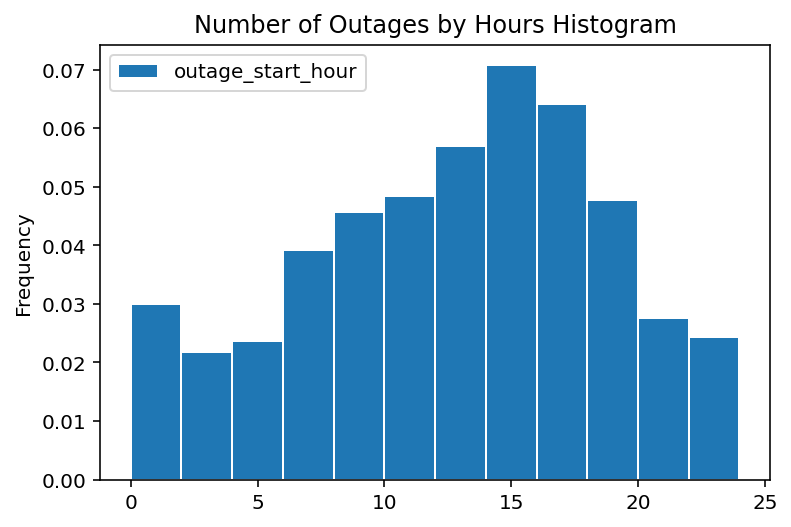

In [15]:
#define the title
title = 'Number of Outages by Hours Histogram'
#create a new column that conatin outage hour information
new_df['outage_start_hour'] = new_df['OUTAGE.START'].dt.hour
new_df['outage_start_hour']
#plot the histogram
(
    new_df['outage_start_hour']
        .plot(kind='hist',bins = np.arange(0, 25, 2), 
              density=True, ec='w',title=title,legend=True)
);

***

Also, we want to investigate the occurence of outages by _**month**_; therefore, we want to create a new variable `'outage_start_month'` and explore the histogram as well.

##### Observation
We observe that there are two spikes, one is at 6-7, and the other is at 11-12. It seems that the outages are more likely to occur at summer or winter.

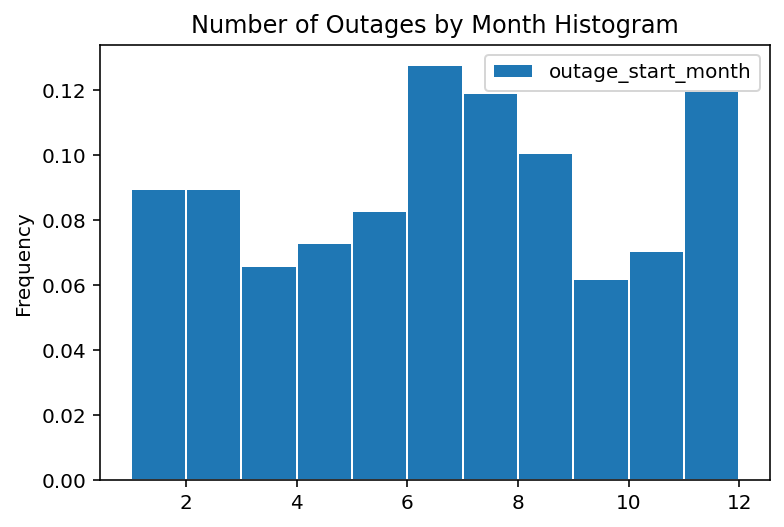

In [16]:
#create new column
new_df['outage_start_month'] = new_df['OUTAGE.START'].dt.month
new_df['outage_start_month']
title = 'Number of Outages by Month Histogram'
(new_df['outage_start_month']
    .plot(kind='hist',bins = np.arange(1, 13),
          density=True, ec='w',legend=True, title=title
         )
);

***

To investigate the **year** that the outage tend to occur, we draw the histogram by using the column `'YEAR'`. 

##### Observation
The outages have an overall increasing trend, and in 2011, there seemed to be abnormal amount of outages. 

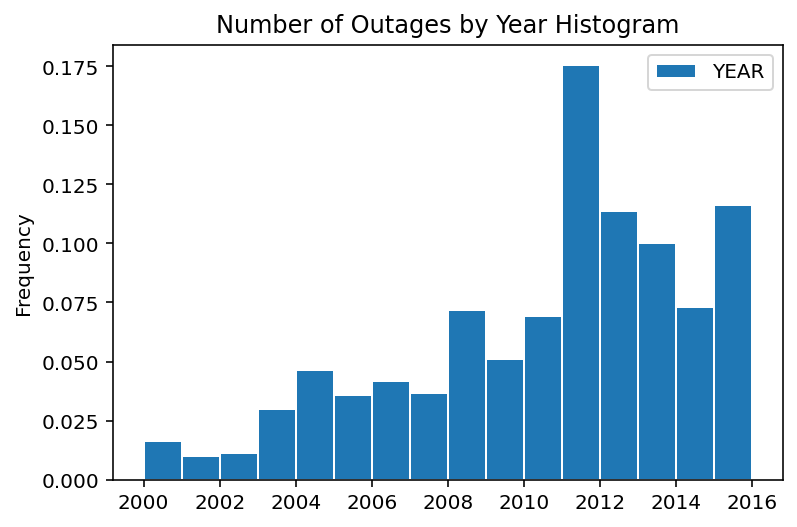

In [17]:
#create a title
title = 'Number of Outages by Year Histogram'
#plot the year histogram
(new_df['YEAR']
    .plot(kind='hist',bins = np.arange(2000, 2017),
          density=True, ec='w',legend=True, title=title
         )
);

***

We want to know where is the outage most commonoly happened, in order to plot, we first create a DataFrame `new_df3` wich only have the desired columns `'U.S._STATE'` and a new column `'Number of outages'`

In [18]:
#create a new DataFrame
new_df2 = pd.DataFrame()
#group by 'U.S._STATE' and cont the number of outages in each category
new_df2['Number of outages'] = new_df.groupby('U.S._STATE')['YEAR'].count().sort_values(ascending = False)
new_df3 = new_df2[['Number of outages']].reset_index()
new_df3.head()

,U.S._STATE,Number of outages
0,California,210
1,Texas,127
2,Washington,97
3,Michigan,95
4,New York,71


We want to know where is the outage most commonoly happened, thus we plot the distribution of outages by state with a bar chart, with the most common state at the top.

##### Observation
California is the most common place where outages happen

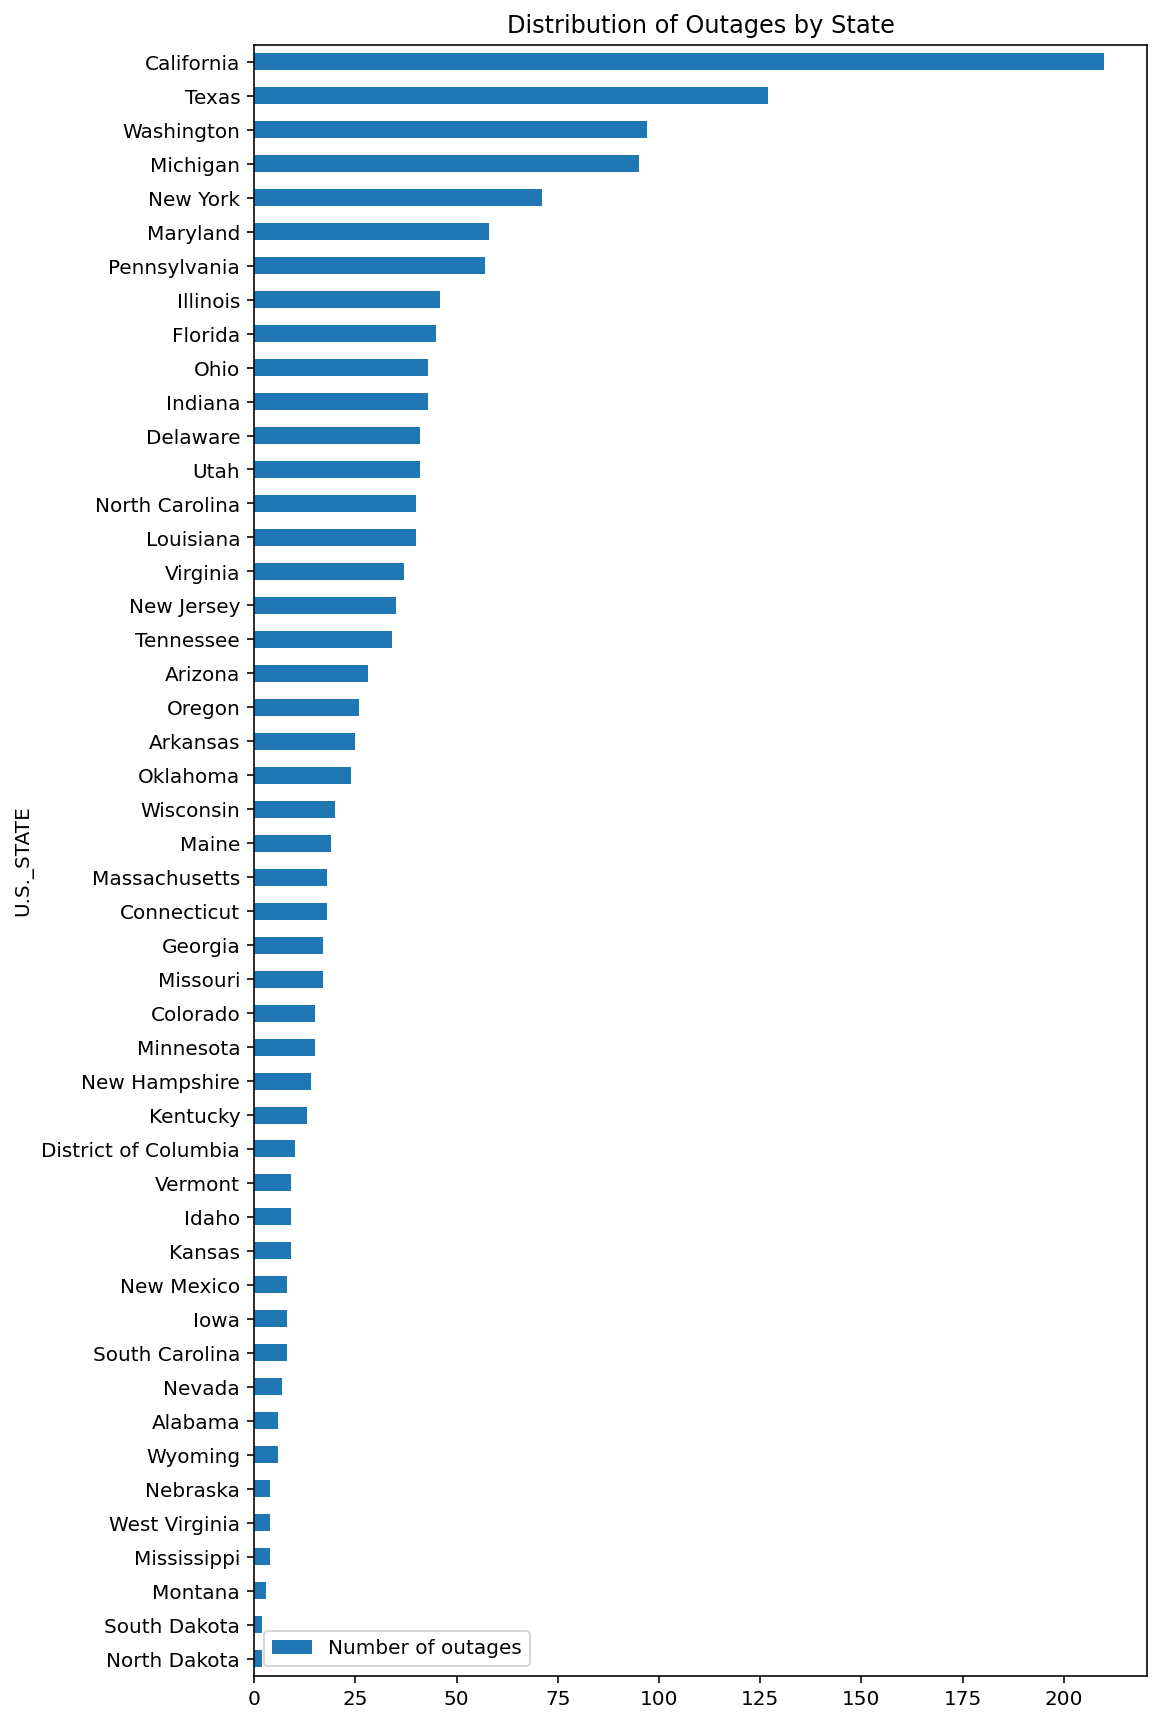

In [19]:
#sort the value by state
(
    new_df3.sort_values(by = 'Number of outages')
    .plot(kind='barh', x='U.S._STATE', y='Number of outages', 
          title='Distribution of Outages by State', figsize=(8, 15))
);

***

We want to understand what are the most common causes of outages, so we plot the distribution of outages causes with a pie chart.

##### Observation
From the pie chart, we observe that severe weather is the most common cause (about 50%), and international attack, system operability disruption are the second and third common cause.

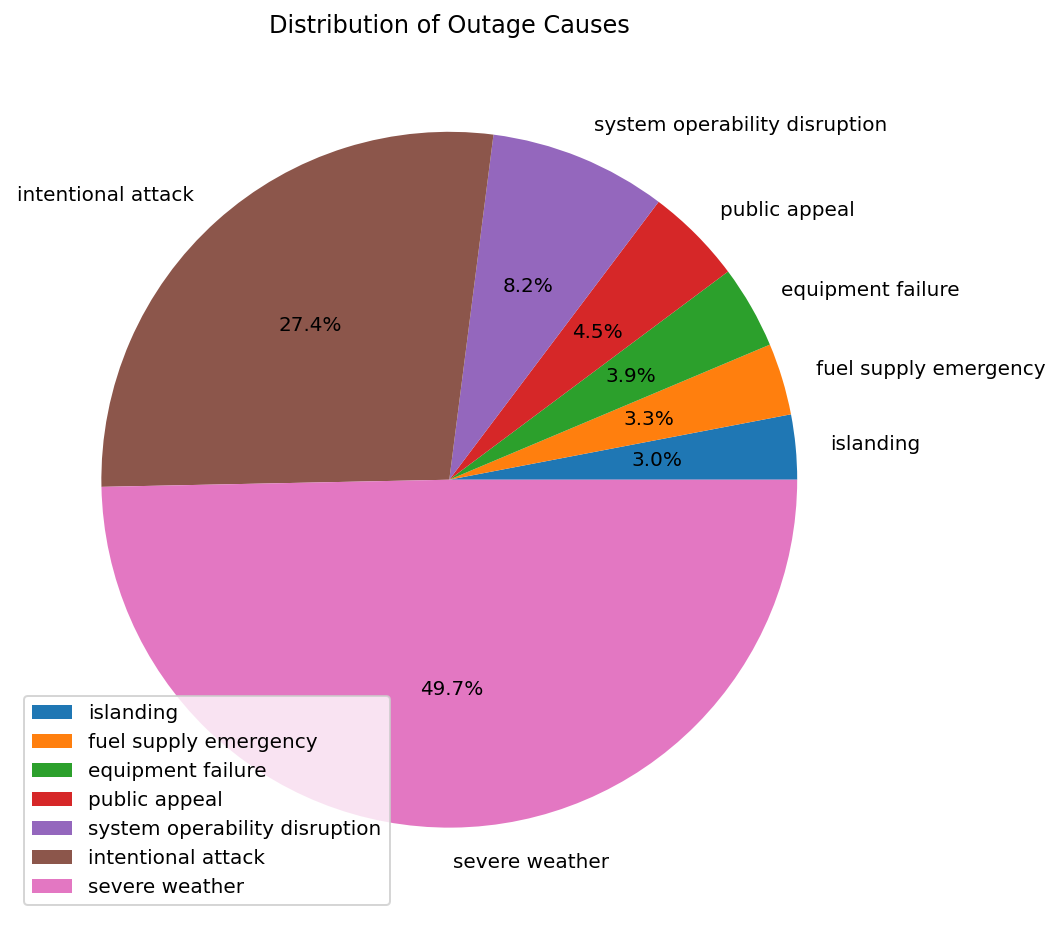

In [20]:
#group by cause and count the number of outages in each category
new_df.groupby('CAUSE.CATEGORY').count().sort_values(by='YEAR').plot(kind='pie',
                                                                       y='YEAR',
                                                                       autopct='%1.1f%%',
                                                                       title='Distribution of Outage Causes',
                                                                       figsize = (9, 8));
plt.legend(loc="lower left")
#remove y label
plt.ylabel ("");

***

### Bivariate Analysis

In order to create better visualization in this section, we create a method that return the DataFrame after filtering outlier, and we check its effect by plotting a histogram of `CUSTOMERS.AFFECTED` with outliers filtered. The orange distribution is visalization after outliers removed, the blue one is before the outlier is removed. We can see the visulization after this filtering has improved. (This is not the bivariate Analysis itself. It is the preparation step)

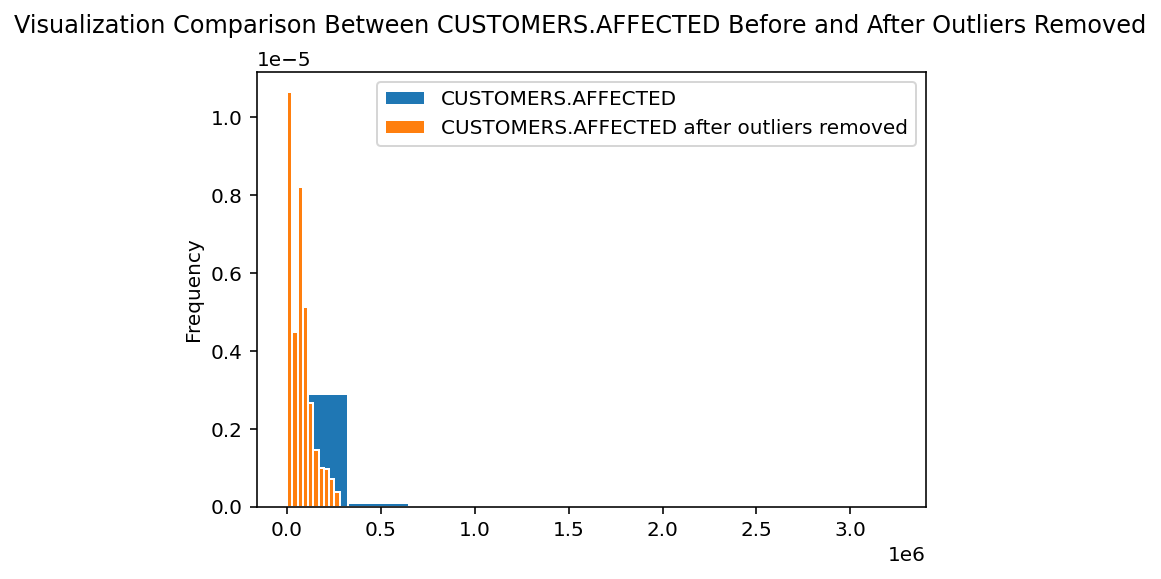

In [21]:
#craete function that filter out outlier
def filter_outlier(df,col):
    df1 =df.copy()
    Q1 = np.nanpercentile(df1[col], 25,
                   method = 'midpoint')
 
    Q3 = np.nanpercentile(df1[col], 75,
                       method = 'midpoint')
    IQR = Q3 - Q1
    # Upper bound
    upper = np.where(df1[col] < (Q3+1.5*IQR))
    # Lower bound
    lower = np.where(df1[col] > (Q1-1.5*IQR))
    #df1.drop(upper[0], inplace = True)
    #df1.drop(lower[0], inplace = True)
    df1 = df1[(df1[col] < (Q3+1.5*IQR))&(df1[col] > (Q1-1.5*IQR))]
    return df1
filter_cus = filter_outlier(new_df1,'CUSTOMERS.AFFECTED')
filter_cus['CUSTOMERS.AFFECTED after outliers removed'] = filter_cus['CUSTOMERS.AFFECTED']
new_df1['CUSTOMERS.AFFECTED'].plot(kind='hist',density=True,bins=10,ec='w',legend=True);
filter_cus['CUSTOMERS.AFFECTED after outliers removed'].plot(kind='hist',density=True,bins=10,ec='w',legend=True)
#create a title for the graph
plt.suptitle('Visualization Comparison Between CUSTOMERS.AFFECTED Before and After Outliers Removed')
plt.show();

DataFrame with duration outlier filterd, which prepare for the next section of visualization

In [22]:
#create new dataframe
filter_duration_df = filter_outlier(new_df,'OUTAGE.DURATION')
filter_duration_df.head()

,YEAR,MONTH,U.S._STATE,NERC.REGION,CLIMATE.REGION,CLIMATE.CATEGORY,OUTAGE.START.DATE,OUTAGE.START.TIME,OUTAGE.RESTORATION.DATE,OUTAGE.RESTORATION.TIME,...,TOTAL.SALES,POPULATION,POPPCT_URBAN,POPDEN_RURAL,POPDEN_URBAN,OUTAGE.START,OUTAGE.RESTORATION,total_affected_min,outage_start_hour,outage_start_month
0,2011,7.0,Minnesota,MRO,East North Central,normal,2011-07-01,17:00:00,2011-07-03,20:00:00,...,6562520.0,5348119,73.27,18.2,2279.0,2011-07-01 17:00:00,2011-07-03 20:00:00,214200000.0,17.0,7.0
1,2014,5.0,Minnesota,MRO,East North Central,normal,2014-05-11,18:38:00,2014-05-11,18:39:00,...,5284231.0,5457125,73.27,18.2,2279.0,2014-05-11 18:38:00,2014-05-11 18:39:00,NaN,18.0,5.0
2,2010,10.0,Minnesota,MRO,East North Central,cold,2010-10-26,20:00:00,2010-10-28,22:00:00,...,5222116.0,5310903,73.27,18.2,2279.0,2010-10-26 20:00:00,2010-10-28 22:00:00,210000000.0,20.0,10.0
3,2012,6.0,Minnesota,MRO,East North Central,normal,2012-06-19,04:30:00,2012-06-20,23:00:00,...,5787064.0,5380443,73.27,18.2,2279.0,2012-06-19 04:30:00,2012-06-20 23:00:00,173910000.0,4.0,6.0
4,2015,7.0,Minnesota,MRO,East North Central,warm,2015-07-18,02:00:00,2015-07-19,07:00:00,...,5970339.0,5489594,73.27,18.2,2279.0,2015-07-18 02:00:00,2015-07-19 07:00:00,435000000.0,2.0,7.0


A DataFrame that explore the relationship between climate region and states in the U.S., which will help us to understand our major question in that hypothesis test. The count column shows the number of outages in each state, and within each climate region, states are sorted by the number of outages.

In [23]:
#use groupby to plot
region_state_num_of_outages = new_df.groupby(['CLIMATE.REGION', 'U.S._STATE'])['YEAR'].agg(['count']).sort_values(by=['CLIMATE.REGION', 'count'], ascending = False)
region_state_num_of_outages.head(10)

count
CLIMATE.REGION     U.S._STATE         
West North Central Wyoming           6
                   Nebraska          4
                   Montana           3
                   North Dakota      2
                   South Dakota      2
West               California      210
                   Nevada            7
Southwest          Utah             41
                   Arizona          28
                   Colorado         15

To better understand the severity of outages correspond to different states and explore with cause contributes most to the outage severity in each state, we plot a pivot table below.

Following are some observations:

Here are the key causes that contriutes to the severity in the states with the most number of outages
- California : fuel, severe weather
- Washington : equipment, severe weather

In addition, by counting `NaN` values in columns, we can infer what are the causes that is most common cause of outages among all the states in U.S.

In [24]:
# use .pivot_table method, with states as row lable, and cause as columns names
piv_state_cause = new_df.pivot_table(index='U.S._STATE', 
                     columns='CAUSE.CATEGORY', 
                     values='OUTAGE.DURATION', 
                     aggfunc='median')
piv_state_cause.head()

CAUSE.CATEGORY,equipment failure,fuel supply emergency,intentional attack,islanding,public appeal,severe weather,system operability disruption
U.S._STATE,,,,,,,
Alabama,NaN,NaN,77.0,NaN,NaN,1016.5,NaN
Arizona,67.5,NaN,180.0,NaN,NaN,26760.0,384.5
Arkansas,105.0,NaN,175.0,3.0,300.0,1213.5,NaN
California,269.0,882.5,117.0,128.5,420.0,962.0,199.0
Colorado,NaN,NaN,105.0,2.0,NaN,2425.0,337.5


Explore the relation between outage duration and outage year by scatter plot.

We find that there is no obvious association between the two variable, even though we have already cleaned the outage duration column. The reason may be scatter plot is not so suitable here since every year there is many outages, forming multple verticle lines of dots. Thus, we dicide to explore the relation with more graphs.

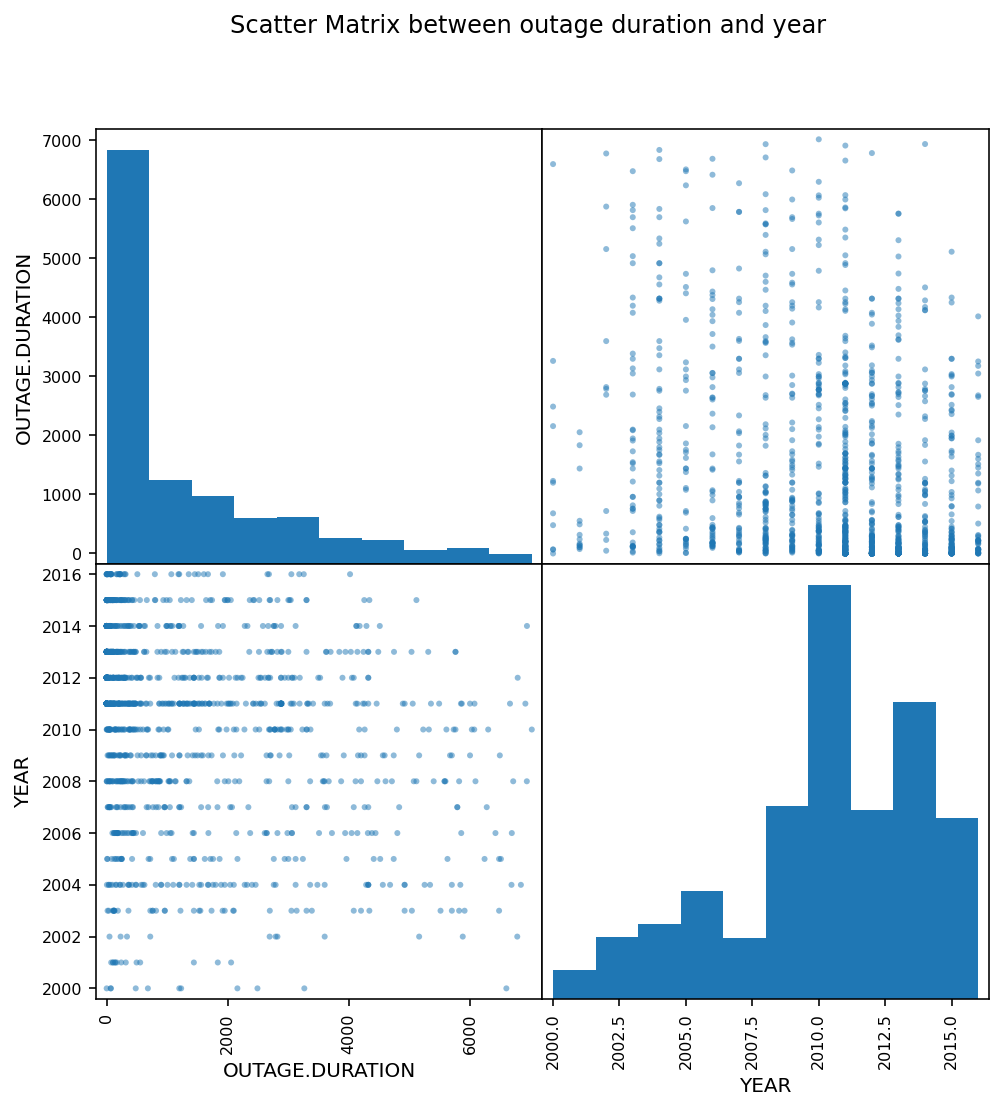

In [25]:
#plot multiple graphs with scatter matrix
pd.plotting.scatter_matrix(filter_duration_df[['OUTAGE.DURATION', 'YEAR']], figsize=(8, 8))
plt.suptitle('Scatter Matrix between outage duration and year')
plt.show();

We find line plot to be suitable here, since a line plot shows the change of a numerical variable over time. From the below line plot, we observe that the median outage duration had reached a peak in around 2002, and then become to decrease in the following years.

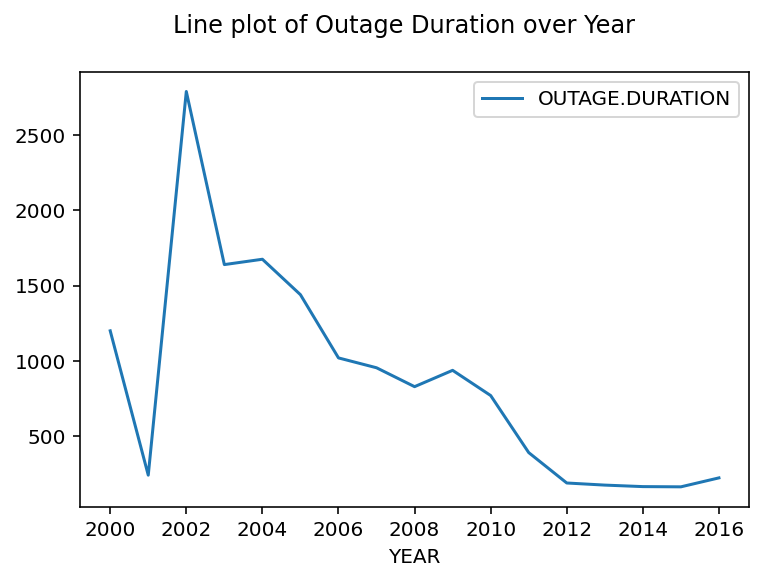

In [26]:
#craete a title
title ='Trend of Median Duration of Outage by Year'
filter_duration_df.groupby('YEAR')['OUTAGE.DURATION'].median().plot(kind='line',legend=True);
plt.suptitle('Line plot of Outage Duration over Year')
plt.show();

We also plot a scatter plot with the median of outage duration which also shows this decreasing trend

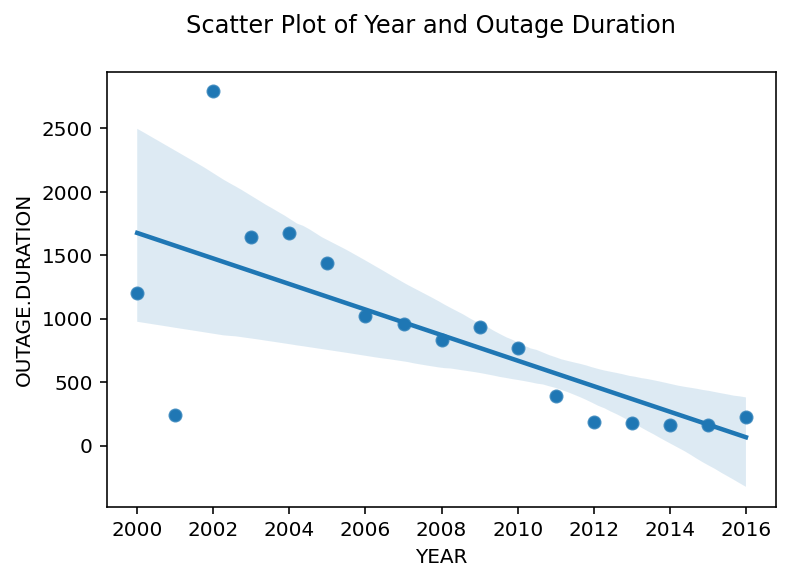

In [27]:
#create scatterplot with regression line and confidence interval line
title ='Trend of Median Duration of Outage by Year'
(
filter_duration_df.groupby('YEAR')['OUTAGE.DURATION'].median().reset_index().
plot(kind='scatter',x='YEAR', y='OUTAGE.DURATION', legend=True)
);
import seaborn as sns
x=filter_duration_df.groupby('YEAR')['OUTAGE.DURATION'].median().reset_index()['YEAR']
y=filter_duration_df.groupby('YEAR')['OUTAGE.DURATION'].median().reset_index()['OUTAGE.DURATION']
#create scatterplot with regression line and confidence interval line
sns.regplot(x=x, y=y);
plt.suptitle('Scatter Plot of Year and Outage Duration')
plt.show();

### Interesting Aggregate

In this portion, we decide to further explore the realation of severity of outages and other variables. We will consider its relation with outages' cause, economic characteristics (sales), and geographical and meteorological characteristics.

###### 1) 
We first explore the relation between affect level (severity level) and cause category. Below is a DataFrame that show the mean and median outages severity level of different `CAUSE.CATEGORY`.

Observation: 
- outages of type `severe weather` have the highest mean and median of severity level.
- outages of type `fuel supply emergency` have the second highest mean and median of severity level.
- outages of type `intentional attack` and `islanding` have the lowest mean and median of severity level.

In [28]:
#change categorical value into integer
new_df1['affect_level']=new_df1['affect_level'].astype(int)
new_df1.groupby('CAUSE.CATEGORY')['affect_level'].agg(['mean', 'median'])

,mean,median
CAUSE.CATEGORY,,
equipment failure,3.542373,3.0
fuel supply emergency,5.450980,5.0
intentional attack,2.007177,1.0
islanding,1.891304,2.0
public appeal,3.797101,4.0
severe weather,6.420290,7.0
system operability disruption,3.785714,3.0


##### 2) 
We explore relation between different sales and the affect level. Below are multiple scatter plots that show the relation between residential sales, commercial sales, industrial sales, and total sales. (The distribution of each data is also showned)

Observation: there seems to be no obvious difference between different sales. The scatter plots of the four kinds of sales have similar pattern
 - most data points have total affected day less than 1.

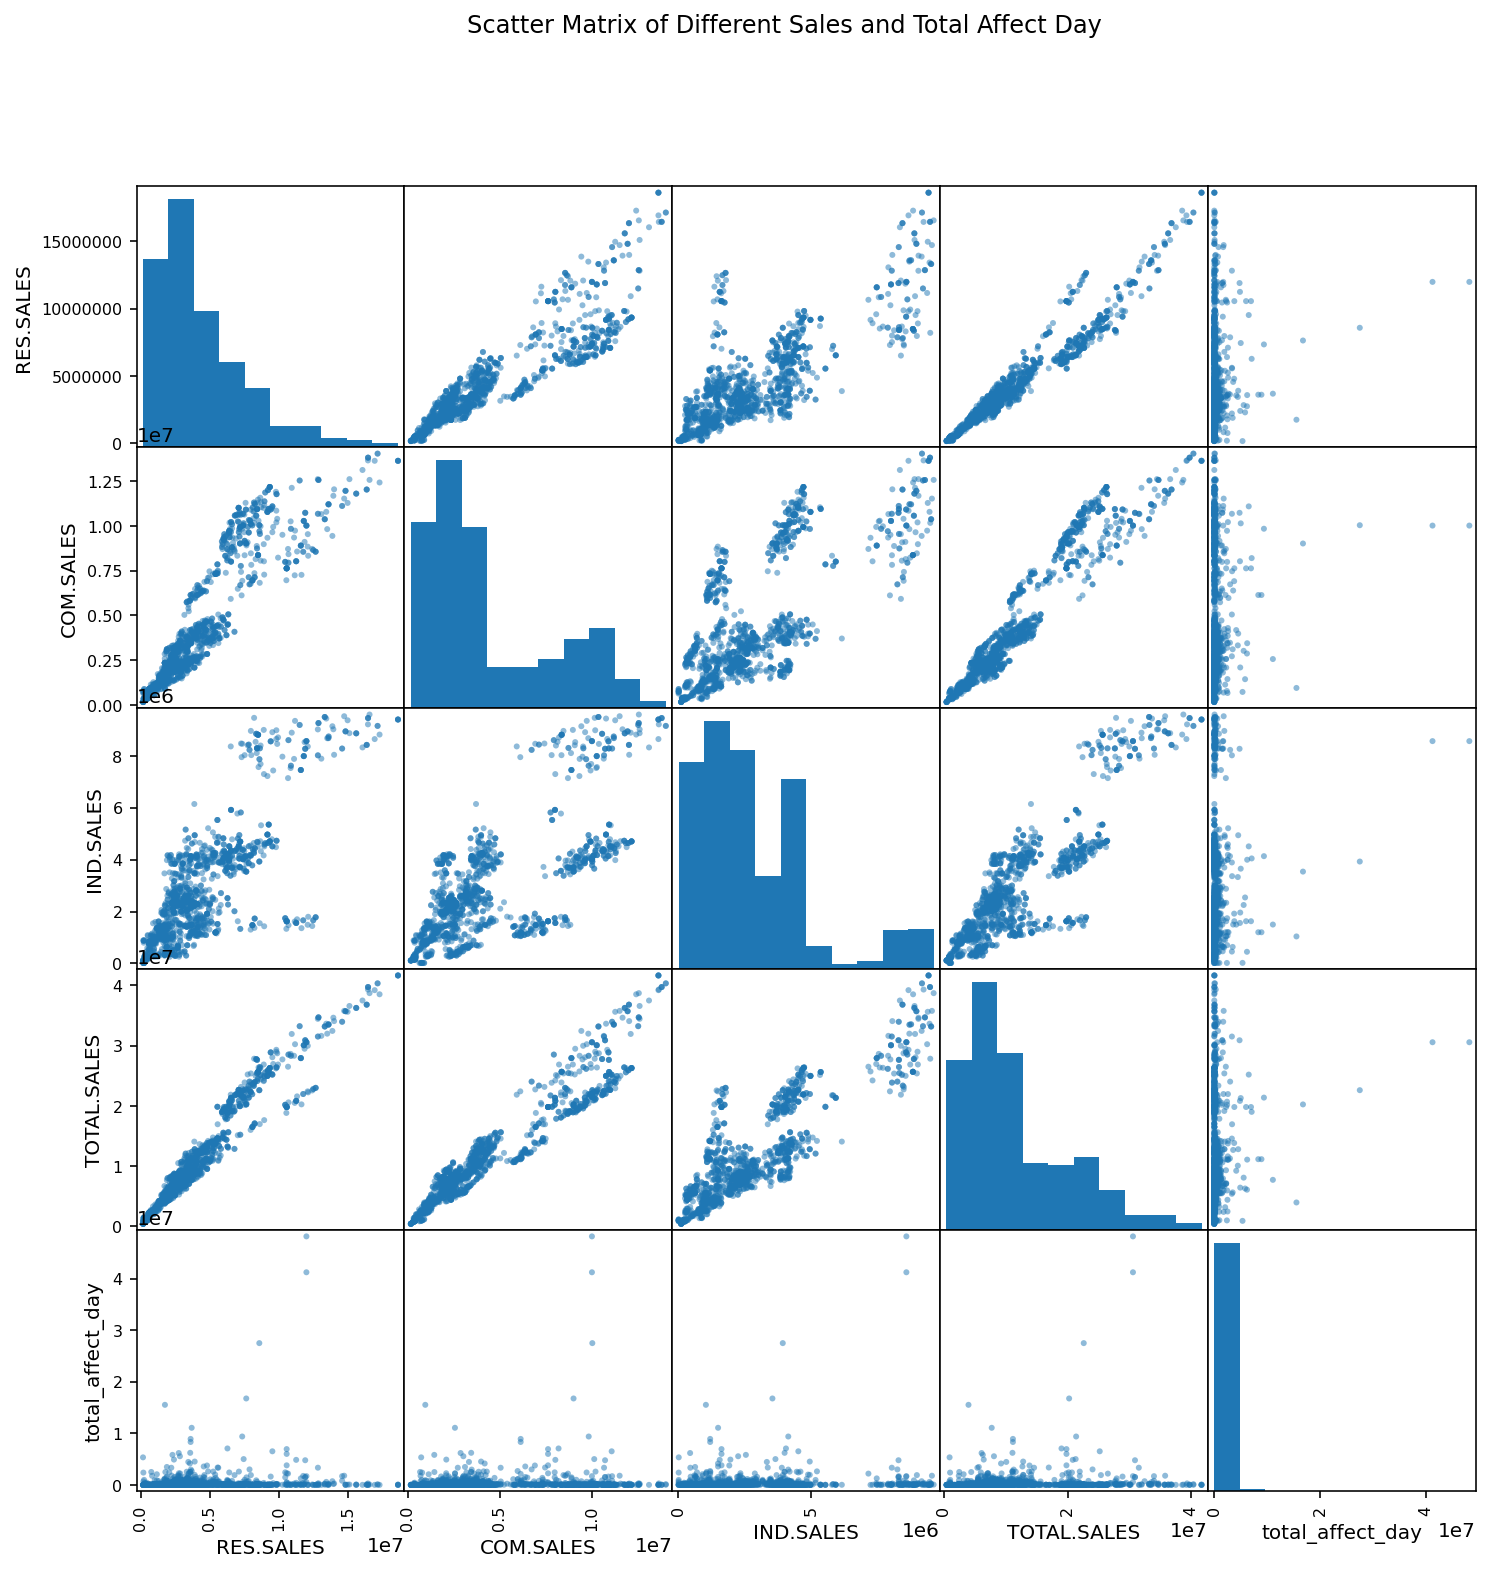

In [29]:
#plot multiple plots with method .scatter_matrix(), and use all the sales column and a measurement of severity
#as parameter
title = 'Scatter Matrix of Different Sales and Total Affect Day'
(pd.plotting.scatter_matrix(new_df1[['RES.SALES','COM.SALES','IND.SALES','TOTAL.SALES','total_affect_day']]
                            ,figsize=(12,12)));
plt.suptitle(title)
plt.show()

##### 3) 
Explore realation between climate category and affect level, below is a DataFrame that shows the median and mean of the outages severity level in different `CLIMATE.CATEGORY`.

Observation: outages happened in normal climate category seems to have a lower affect level (or severity level)

In [30]:
#show a DataFrame that is created by grouping climate category, use aggregate method median and mean
new_df1.groupby('CLIMATE.CATEGORY')['affect_level'].agg(['median', 'mean'])

,median,mean
CLIMATE.CATEGORY,,
cold,5.0,4.652542
normal,4.0,4.517520
warm,5.0,4.715686


#### 4)
Explore realation between `NERC.REGION` and `affect_level`, below is a DataFrame that shows the mean and median of severity level in different `NERC.REGION`

Observation: 
- `ECAR` region has the highest median and mean of outages severity level.
- `WECC` region has the lowest median and mean of outages severity level.

In [31]:
#show a DataFrame that is created by grouping NERC region, use aggregate method median and mean
tb =new_df1.groupby(['NERC.REGION'])['affect_level'].agg(['median', 'mean']).head(10)
tb

,median,mean
NERC.REGION,,
ECAR,8.0,7.794118
FRCC,4.0,4.636364
"FRCC, SERC",4.0,4.000000
MRO,4.0,4.565217
NPCC,4.0,4.333333
RFC,6.0,5.260143
SERC,5.0,4.814634
SPP,5.0,4.955224
TRE,6.0,5.558559


In [32]:
#show a DataFrame that is created by grouping climate region, use aggregate method median and mean
tb =new_df1.groupby(['CLIMATE.REGION'])['affect_level'].agg(['median', 'mean']).head(10)
tb

,median,mean
CLIMATE.REGION,,
Central,5.0,5.050000
East North Central,7.0,6.413043
Northeast,5.0,4.574286
Northwest,3.0,3.583333
South,5.0,5.205240
Southeast,5.0,5.084967
Southwest,2.0,2.532609
West,3.0,3.792627
West North Central,1.0,1.764706


#### 5)
Explore realation between `NERC.REGION` and `affect_level` in different years.To better understand the severity of ootages correspond to different year and explore which climate region contributes most to the outage severity in each year, we plot a pivot table below.

Observation: 
- outages from region `East North Central` almost have the highest median of severity level in every year.
- outages from region `West North Central` almost have the lowest median of severity level in every year.

In [33]:
# use .pivot_table() method to create table with Year as index and climate region as columns, 
#showing value of affect level
new_df1.pivot_table(index='YEAR',
                    columns='CLIMATE.REGION',
                    values='affect_level',
                    aggfunc='median',
                    fill_value=0).head()

CLIMATE.REGION,Central,East North Central,Northeast,Northwest,South,Southeast,Southwest,West,West North Central
YEAR,,,,,,,,,
2000,4.0,0.0,1.0,0.0,4.5,7.0,3.0,3.0,0.0
2001,0.0,0.0,4.5,0.0,6.0,6.0,0.0,4.0,0.0
2002,9.0,8.0,7.0,0.0,8.0,5.0,1.0,9.0,0.0
2003,6.0,7.5,8.0,5.0,6.0,3.5,2.5,7.0,0.0
2004,8.0,8.0,6.0,8.0,6.0,5.0,9.0,5.0,2.0


### Assessment of Missingness

#### Permutation for missingness of `"CAUSE.CATEGORY.DETAIL"` dependent on the `"CAUSE.CATEGORY"`

According to information from dataset, `CAUSE.CATEGORY.DETAIL` has 471 missing values. To check on whether it is **NMAR**, we look through the article ["A multi-hazard approach to assess severe weather-induced major power outage risks in the U.S."][1], and it explained that "the quality and completeness of the data is checked, validated and
approved by the Office of Electricity Delivery and Energy Reliability." and also mentioned entities who are required to file the report of outage need to report the intial of incident within 1-6 hour after the incident happened, and submit the final report within 72h, which means the data is collected in an organized and detailed way that is gearanteed double check, so there is no issue with the data generating process. Thus, to find out the missing type of `"CAUSE.CATEGORY.DETAIL"`, we still need to back to other columns and figure out is the missing of data dependent on other variables, or the missing just happened completely at random. 

After our analyzation and inference, we think there might be connection between `CAUSE.CATEGORY.DETAIL` and `CAUSE.CATEGORY`, our guess is that when the cause of outage is certain type, for instance, "equipment failure", it needs to be specified which part of equipment caused the failure, so it has a more detail explanation in `CAUSE.CATEGORY.DETAIL`; on the contrary, cause like 'public appeal' is clear enough and don't need to complement more detail, so it will be missing.

Therefore, to justify our guess, we make a pivot table to see the difference between the proportion of each type of cause it takes with the data in `CAUSE.CATEGORY.DETAIL` is missing or not missing.

[1]: <https://www.sciencedirect.com/science/article/pii/S0951832017307767> "A multi-hazard approach to assess severe weather-induced major power outage risks in the U.S."

In [34]:
#create a column of Trues and False of category_detail_missing
new_df1['category_detail_missing'] = new_df1['CAUSE.CATEGORY.DETAIL'].isna()
#create a pivot table to understand the data, and for computing tvd later
dist2 =(
    new_df1
    .pivot_table(index='CAUSE.CATEGORY',columns='category_detail_missing',aggfunc='size')
    .fillna(0)
    .apply(lambda x: x / x.sum())
)
dist2

category_detail_missing,False,True
CAUSE.CATEGORY,,
equipment failure,0.044381,0.025586
fuel supply emergency,0.030217,0.040512
intentional attack,0.349386,0.102345
islanding,0.000000,0.098081
public appeal,0.000000,0.147122
severe weather,0.541076,0.396588
system operability disruption,0.034939,0.189765


From the above pivot table, we can see that in the category like "islanding" and "public appeal" doesn't take any proportion in the data where category detail is not missing; in other words, they don't have any non-missing value in the `CAUSE.CATEGORY.DETAIL` column, while they both took nearly 10 percent in the data where `CAUSE.CATEGORY.DETAIL` is missing. And to visually understands how big is the difference between each category, we draw a bar plot from the pivot table.

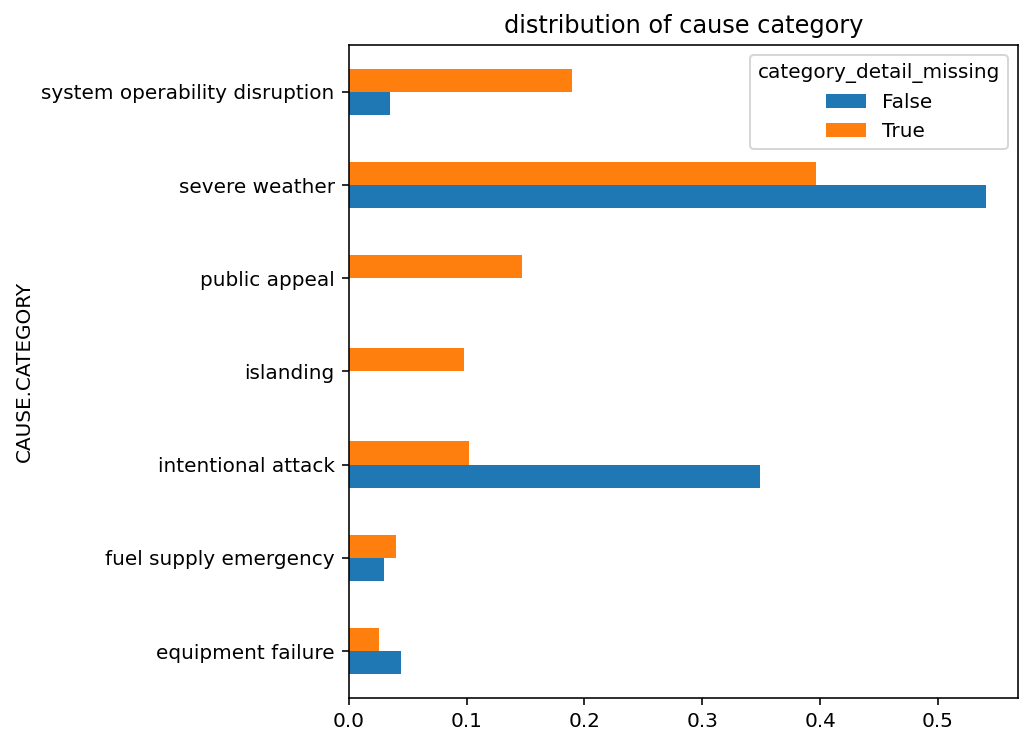

In [35]:
#plot distribution of cause by whether or not detail is missing
dist2.plot(kind='barh',figsize=(6,6),title='distribution of cause category');

Then, to quantify the total difference between the distribution of `CAUSE.CATEGORY` when `CAUSE.CATEGORY.DETAIL` is missing or not, we apply TVD to caluclate the total difference between the two proportions in each category, where it add up the absolute values of all the differences, and then divide the sum by 2.

In [36]:
#calculate the observed tvd 
observed_tvd_detail = np.sum(np.abs(dist2.diff(axis=1).iloc[:,-1])) / 2
observed_tvd_detail

0.4103239367710214

Our observed TVD is 0.410.

Then we want to perform a permutation test to see whether the distribution of `CAUSE.CATEGORY` is same for data when the `CAUSE.CATEGORY.DETAIL` is missing and not missing. 

In [37]:
#perform permutation test
n_repetitions = 10000

perm_detail_df = new_df1.copy()[['CAUSE.CATEGORY', 'category_detail_missing']]
tvds = []
for _ in range(n_repetitions):
    #suffle values in category_detail_missing
    shuffled_miss = (
        perm_detail_df['category_detail_missing']
        .sample(replace=False, frac=1)
        .reset_index(drop=True)
    )
    
    perm_detail_df['Shuffled Miss'] = shuffled_miss
    
    # compute the tvd
    shuffed_emp_distributions = (
        perm_detail_df
        .pivot_table(columns='Shuffled Miss', index='CAUSE.CATEGORY', values=None, aggfunc='size')
        .fillna(0)
        .apply(lambda x:x/x.sum())
    )
    
    tvd = np.sum(np.abs(shuffed_emp_distributions.diff(axis=1).iloc[:,-1])) / 2
    # add it to the list of results
    
    tvds.append(tvd)
p_val_detail = (tvds>=observed_tvd_detail).mean()
p_val_detail

0.0

We use a 95% Confidence Interval since it is most commonly recogonized. Our `p_val` = 0.00, which means that 0 percent of TVD we permuted is greater than our observation,so we reject the null hypothesis that the missingness of `'CAUSE.CATEGORY.DETAIL'` is not dependent on `'CAUSE.CATEGORY'`. Thus, we conclude that the missingness of `'CAUSE.CATEGORY.DETAIL'` is **MAR** and ites missing is dependent on `CAUSE.CATEGORY`, and this is consistent with our inference.

#### Permutation for missingness of `"CUSTOMERS.AFFECTED"`  not dependent on the `"CLIAMTE.CATEGORY"`

According to information from dataset, `CUSTOMERS.AFFECTED` has 443 missing values. To check on whether it is **NMAR**, we again look through the article ["A multi-hazard approach to assess severe weather-induced major power outage risks in the U.S."][1], besides that "the quality and completeness of the data is checked, validated and approved by the Office of Electricity Delivery and Energy Reliability.", it mentioned that the number of customers affected is evaluated in line with the report of outages (which the entities sumbited inital report within 1-6 hour, and a final report within 72h), which means the data is likely not having issue in the data generating process. Thus, to find out the missing type of `"CUSTOMERS.AFFECTED"`, we decide to back to other columns and figure out is the missing of data dependent on other variables, or the missing just happened completely at random. 

After our analyzation and inference, we want to check whether there is connection between missingness of `"CUSTOMERS.AFFECTED"` and `CLIAMTE.CATEGORY`. Since we assume in normal weather (or in other words favorable temperature) the data is more likely to be recorded, thus in relative bad weather, the data might be more likely to be missing.

Therefore, to justify our guess, we make a pivot table to see the difference between the proportion of each type of weather it takes with the data in `CUSTOMERS.AFFECTED` is missing or not missing.

[1]: <https://www.sciencedirect.com/science/article/pii/S0951832017307767> "A multi-hazard approach to assess severe weather-induced major power outage risks in the U.S."

In [38]:
#create a column of Trues and False of category_detail_missing
new_df1['cus_missing'] = new_df1['CUSTOMERS.AFFECTED_old'].isna()
#create a pivot table to understand the data, and for computing tvd later
dist3 =(
    new_df1
    .pivot_table(index='CLIMATE.CATEGORY',columns='cus_missing',aggfunc='size')
    .fillna(0)
    .apply(lambda x: x / x.sum())
)
dist3

cus_missing,False,True
CLIMATE.CATEGORY,,
cold,0.303985,0.326531
normal,0.484708,0.496599
warm,0.211307,0.176871


From the above pivot table, we can read that the differnece in each category is kind of small. To visually displayed such difference, we draw the bar plot below.

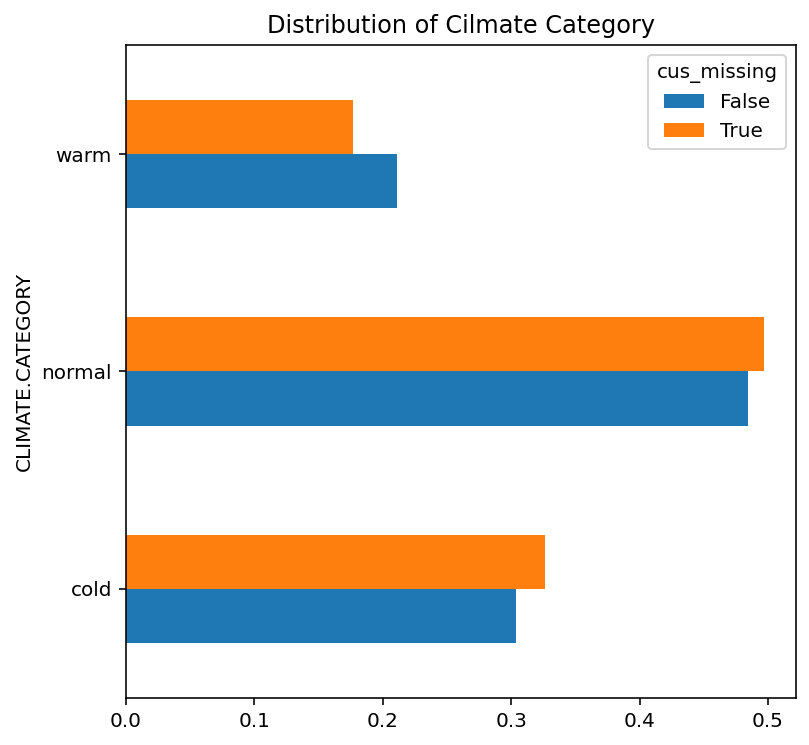

In [39]:
#plot the distribution to visualize difference
dist3.plot(kind='barh',figsize=(6,6),title='Distribution of Cilmate Category');

We can observe that the distribution of `CLIMATE.CATEGORY` is actually very similar between data where `CUSTOMERS.AFFECTED` is missing and where is not missing. Again, we decide to TVD to show the absolute total diifference in distribution.

In [40]:
#calculate observed tvd
observed_tvd_outage = np.sum(np.abs(dist3.diff(axis=1).iloc[:,-1])) / 2
observed_tvd_outage

0.03443601722431325

Our observed tvd is 0.034. 

Then we want to perform a permutation test to see whether the distribution of `CAUSE.CATEGORY` is same for data when the `CAUSE.CATEGORY.DETAIL` is missing and not missing.

In [41]:
#perform permutation test
n_repetitions = 10000

perm_start_df = new_df1.copy()[['CLIMATE.CATEGORY', 'cus_missing']]
tvds = []
for _ in range(n_repetitions):
    #suffle cus_missing
    shuffled_miss = (
        perm_start_df['cus_missing']
        .sample(replace=False, frac=1)
        .reset_index(drop=True)
    )
    
    perm_start_df['Shuffled Miss'] = shuffled_miss
    
    # compute the tvd
    shuffed_emp_distributions = (
        perm_start_df
        .pivot_table(columns='Shuffled Miss', index='CLIMATE.CATEGORY', values=None, aggfunc='size')
        .fillna(0)
        .apply(lambda x:x/x.sum())
    )
    
    tvd = np.sum(np.abs(shuffed_emp_distributions.diff(axis=1).iloc[:,-1])) / 2
    # add it to the list of results
    
    tvds.append(tvd)
p_val_detail = (tvds>=observed_tvd_outage).mean()
p_val_detail

0.3697

We use a 95% Confidence Interval since it is most commonly recogonized. Our `p_val` = 0.3697, which means that 36.97 percent of TVD we permuted is greater than our observation, so we cannot reject the null hypothesis that the missingness of `'CUSTOMRERS.AFFECTED'` is not dependent on `'CLIAMTE.CATEGORY'`. Thus, we conclude that the missingness of `'CUSTOMRERS.AFFECTED'` is **not** dependent on `CLIMATE.CATEGORY`. 

### Hypothesis Test

### Setup

From the below DataFrame, which calculate the number of outages and the mean of outage affect level by climate region, we find that `East North Central` has a very high affect level compared to other regions. Thus, we are curious whether this is by chance.

In [42]:
#create DataFrame via groupby and aggregate method count and mean.
affect_level_by_region = new_df1.groupby('CLIMATE.REGION')['affect_level'].agg(['count', 'mean']).sort_values(by = 'mean', ascending = False)
affect_level_by_region.head()

,count,mean
CLIMATE.REGION,,
East North Central,138,6.413043
South,229,5.205240
Southeast,153,5.084967
Central,200,5.050000
Northeast,350,4.574286


Thus, we come up with the hypothesis:

- **Null hypothesis:** Severety level of outages and climate regions **are not** related – the high severety level of outages in East North Central is due to chance alone.
    - In other words, if we picked 138 outages randomly from the population of 1534 outages, it is reasonable to see an median this high.
    
- **Alternative hypothesis:** Severety level of outages and climate regions **are** related – the high severety level of outages in East North Central is not due to chance alone.

We plan to use average affect level as our **test statistic**. We consider this as a good statistic since affect level, which is computed from cleaned `'CUSTOMERS.AFFECTED'` and `'OUTAGE.DURATION'` is a good representation of severity level of outages. By computing its average in the given climate region (East North Central), we konw the overall severiy level of outages in that category.

We first compute the `observed_mean`, which is our observed statistic. According to the null hypothesis, if we repeatedly sample 138 outages from the population and compute their average affect level, it would not be uncommon to see an average affect level as this `observed_mean`.

In [43]:
observed_mean = affect_level_by_region.loc['East North Central', 'mean']
observed_mean

6.413043478260869

We then perform 10_000 simulations, in which we generate 10_000 simulated statistics (simulated means in this case) by repeatedly sampling 138 outages from the population and calculate affect level mean for each sample.

In [44]:
num_reps = 10000
#use np.random.choice to similulate 10000 samples of size 138 and calculate each sample mean
simulated_means = np.random.choice(new_df1['affect_level'], size=(num_reps, 138)).mean(axis=1)
simulated_means

array([4.52898551, 4.93478261, 4.26811594, ..., 5.02173913, 4.93478261,
       4.55072464])

We visualize our simulated statistics distribution (in blue) and the observed statistic (in red)

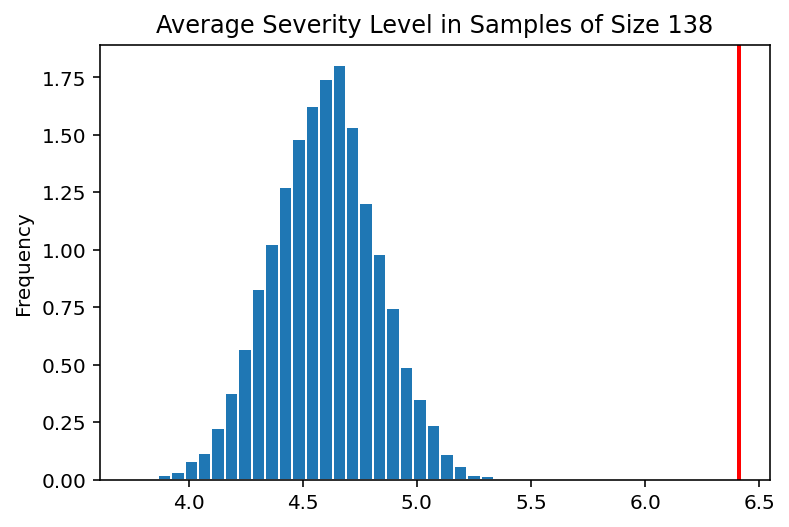

In [45]:
#plot distribution of simulated statistics
pd.Series(simulated_means).plot(kind='hist', 
                              density=True,
                              bins=30,
                              ec='w',
                              title='Average Severity Level in Samples of Size 138');
#plot observed statistics
plt.axvline(x=observed_mean, color='red', linewidth=2);

We use a **95% Confidence Interval** since it is most commonly recogonized. To compute the **p-value**, we calculate the propertion of simulated statistics that is greater than or equal to the observed statistic since by definition, p-value is the probability that under the null hypothesis, the test statistic is equal to the observed statistic or is even further in the direction of the alternative. in this case, our alternative hypothesis is the high severety level of outages in East North Central is not by chance. Thus, it is toward the direction that we have higher mean of affect level.

In [46]:
p_value = (observed_mean<=simulated_means).mean()
p_value

0.0

**Result of Hypothesis Test** 

Since we have a p-value of 0.0 which is smaller than 0.05, we reject the null hypothesis that the high severety level of outages in East North Central is due to chance alone. 

**Uncertainty and Possible Shortcomings**

When performing our hypothesis test, we use average of affect level as our statistic. Although we believe the affect level can represent outage severity level, we are not sure how well the representation is, or whether we can make it better. Currently, the main parameters of calculating the affect level is `'CUSTOMERS.AFFECTED'` and `'OUTAGE.DURATION'`, which both measure the extent of the outages. However, in the given excel, there is another column that also measures the outage extent which is `'DEMAND.LOSS.MW'`. Since we learnt from the description that this column contains many messy data, we did not use it as a parameter when calculating our affect level, while it may be better if we can include this parameter. In future, we may obtain data of `'DEMAND.LOSS.MW'` from other sourse and merge it with our current data, so that we can include it in our computation of severity level.

### Conclusion and Possible Improvement

Through the process of cleaning the data and combining new variables to measure the severity level of power outages, and doing exploratory data analysis to study the trend of power outages, severity level of each region in U.S. continent, and the remakable cause of outages in each region/state in U.S. and the process of studying the missingness in `"CAUSE.CATEGORY.DETAIL"` and `"CUSTOMERS.AFFECTED"` and performing hypothesis test on whether the high severity level of East North Central is due to chance, we find that our analysis can be improved by having more accurate and intact information on numbers of customers that have been affected and the characteristic of the groups of customers. Since the data of number of customers that is been affected in the datset is actually the estimated, if we can find the dataset that have the accurate number or including other useful variables that help us estimate the number of customers affected, we can improve our classification on severity level for each outage events. 

Also we hope we can find a dataset that can complements the informaion about demand loss, which is actually another variable that measures the mount of peak demand loss, but according to the description in dataset, this variable in the dataset mostly recording the total demand instead of the demand loss. If we can find a dataset that replenish the info about demand loss, we can also apply this variable into our measure of severity level, and get a better sense of the cost of each power outages, and let us better learn the pattern of power outages and learn the characteristics of risk factor in eco-socio aspect.